In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import math
from statistics import mean, median
from matplotlib import pyplot as plt
from collections import defaultdict


In [2]:
# ID Customer ID 
# Age Customer's age in completed years 
# Experience #years of professional experience 
# Income Annual income of the customer ($000) 
# ZIPCode Home Address ZIP code. 
# Family Family size of the customer 
# CCAvg Avg. spending on credit cards per month ($000) 
# Education Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
# Mortgage Value of house mortgage if any. ($000) 
# Personal Loan Did this customer accept the personal loan offered in the last campaign? 
# Securities Account Does the customer have a securities account with the bank? 
# CD Account Does the customer have a certificate of deposit (CD) account with the bank? 
# Online Does the customer use internet banking facilities? 
# CreditCard Does the customer uses a credit card issued by UniversalBank?

In [3]:
df = pd.read_csv('Personal Loan.csv', names=['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 
                                             'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
                                             'CD Account', 'Online', 'CreditCard'])
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
2,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
6,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
7,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
8,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
9,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0


In [4]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage
Ordinal Categorical Variables are:

Family - Family size of the customer
Education - education level of the customer

The nominal variable is :
ID, 
Zip Code


In [5]:
df.shape

(5001, 14)

In [6]:
feature=df.drop('Personal Loan', axis=1)
target = df['Personal Loan']

loans = feature.join(target)
loans.drop(0, axis=0, inplace=True)
loans.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
1,1,25,1,49,91107,4,1.60,1,0,1,0,0,0,0
2,2,45,19,34,90089,3,1.50,1,0,1,0,0,0,0
3,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.00,2,0,0,0,0,1,0


In [7]:
loans.tail(5)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4996,4996,29,3,40,92697,1,1.90,3,0,0,0,1,0,0
4997,4997,30,4,15,92037,4,0.40,1,85,0,0,1,0,0
4998,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4999,4999,65,40,49,90034,3,0.50,2,0,0,0,1,0,0
5000,5000,28,4,83,92612,3,0.80,1,0,0,0,1,1,0


# <font color=red>Exploratory Data Analysis</font>


In [8]:
print(loans['ID'])

1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
30        30
        ... 
4971    4971
4972    4972
4973    4973
4974    4974
4975    4975
4976    4976
4977    4977
4978    4978
4979    4979
4980    4980
4981    4981
4982    4982
4983    4983
4984    4984
4985    4985
4986    4986
4987    4987
4988    4988
4989    4989
4990    4990
4991    4991
4992    4992
4993    4993
4994    4994
4995    4995
4996    4996
4997    4997
4998    4998
4999    4999
5000    5000
Name: ID, Length: 5000, dtype: object


In [9]:
listItem = []
for col in loans.columns :
    listItem.append([col,loans[col].dtype,
                     loans[col].isna().sum(),
                     round((loans[col].isna().sum()/len(loans[col])) * 100,2),
                    loans[col].nunique(),
                     list(loans[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,object,0,0.0,5000,"[1239, 3775, 2995, 4198, 661]"
1,Age,object,0,0.0,45,"[59, 47, 41, 51, 30]"
2,Experience,object,0,0.0,47,"[8, 37, 23, 1, 11]"
3,Income,object,0,0.0,162,"[198, 28, 24, 141, 49]"
4,ZIPCode,object,0,0.0,467,"[94923, 91105, 91101, 94114, 94305]"
5,Family,object,0,0.0,4,"[2, 4, 3]"
6,CCAvg,object,0,0.0,108,"[1.90, 0.50, 2.50, 2.00]"
7,Education,object,0,0.0,3,"[1, 2, 3]"
8,Mortgage,object,0,0.0,347,"[204, 0]"
9,Securities Account,object,0,0.0,2,"[0, 1]"


In [10]:
for col in loans.columns:
    loans[col] = pd.to_numeric(loans[col])

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [12]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [13]:
#check to see if any of the columsn have null data in the file
loans.apply(lambda x: sum(x.isnull()), axis=0)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

# <font color=red>Preprocessing and Data Visualisation</font>

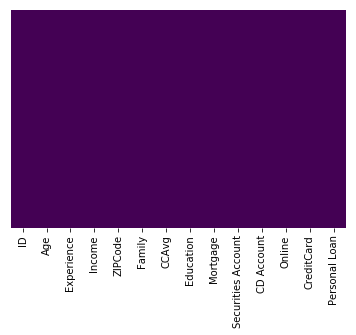

In [14]:
sns.heatmap(loans.isna(), yticklabels=False, cbar=False, cmap='viridis')



In [15]:
loans.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [16]:
outvis = loans.copy()
def fungsi(x):
    if x < 0:
        return np.NaN
    else:
        return x

outvis['Experience'] = outvis['Experience'].apply(fungsi)

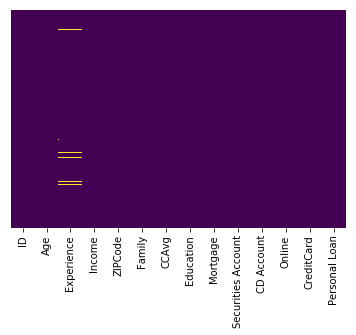

In [17]:
sns.heatmap(outvis.isnull(), yticklabels=False, cbar=False, cmap='viridis')

2nd Irregular value analysis

In [18]:
pd.DataFrame(loans.groupby('Education').mean()['Experience'])

,Experience
Education,
1,20.065363
2,19.770492
3,20.471686


In [19]:
pd.DataFrame(loans.groupby('Age').mean()['Experience']).tail(8)

,Experience
Age,
60,34.645669
61,35.672131
62,36.829268
63,37.638889
64,38.846154
65,39.812500
66,40.875000
67,41.833333


/Users/duyngo/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


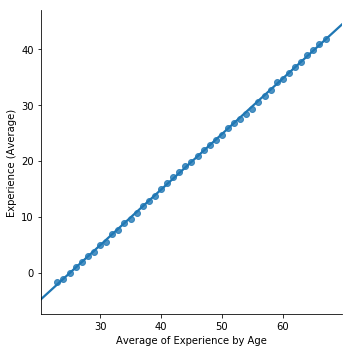

In [20]:
pltdf = pd.DataFrame(loans.groupby('Age').mean()['Experience']).reset_index()
sns.lmplot(x='Age', y='Experience', data=pltdf)
plt.ylabel('Experience (Average)')
plt.xlabel("Average of Experience by Age")
plt.show()




In [21]:
pd.DataFrame(loans[loans['Experience']<0][["Age", "Experience"]].sort_values('Age')).head()




,Age,Experience
2718,23,-2
3131,23,-2
3426,23,-1
2963,23,-2
910,23,-1


In [22]:
pd.DataFrame(loans[loans["Experience"]<0][["Age", "Experience"]].sort_values("Age"))["Age"].unique()


array([23, 24, 25, 26, 28, 29])

In [23]:
pd.DataFrame(loans[loans["Experience"]<0][["Age", "Experience"]]
             .sort_values("Age"))["Experience"].unique()

array([-2, -1, -3])

In [24]:
loans["Experience"] = loans["Experience"].apply(abs)

In [25]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# Data type analysis

It's important to make sure that each feature already use correct data type. Please make sure all features already use correct data type based on whether the feature is categorical or numerical. Please change:
1. categorical feature into 'int64' and 
2. numerical feature into 'float64'

In [26]:
loans[["Age", "Experience", "Income", "CCAvg", "Mortgage"]] = loans[["Age",
                                                                    "Experience", "Income", "CCAvg", "Mortgage"]].astype(float)


In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(5), int64(9)
memory usage: 585.9 KB


The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).



In [28]:
feature = loans.drop(['ID', 'Personal Loan'], axis=1)
target = loans['Personal Loan']

1) Heatmap correlation
Heatmap is one of the simplest method to analyze feature correlation
1. Heatmap correlation with only features (X) - we need to  know correlation between features and avoid multi-correlation features
2. Heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target

In [29]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(feature.corr(), annot=True, square=True)

(12, 12)


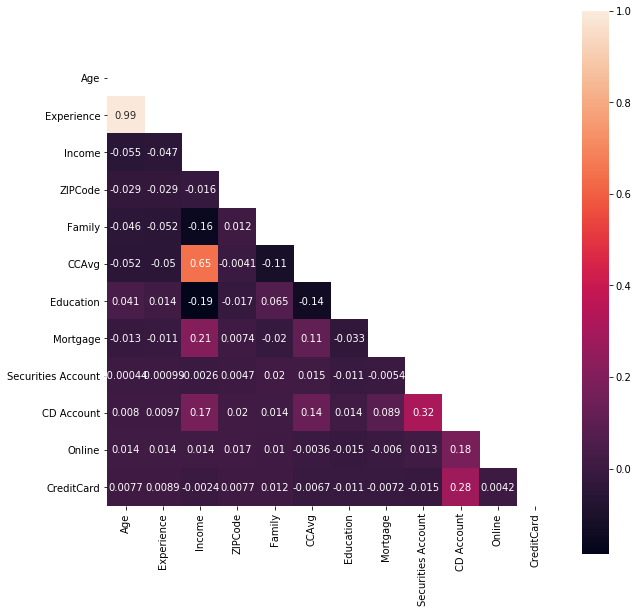

In [30]:
corr = feature.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

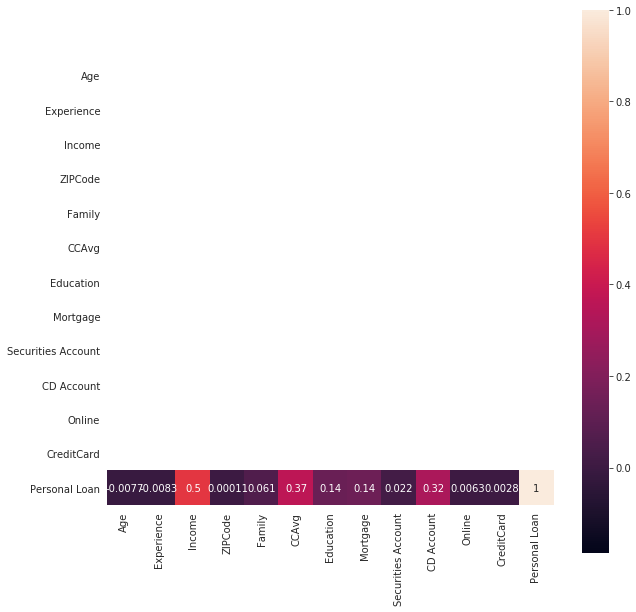

In [145]:
loans_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12, :] = 1

plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    sns.heatmap(loans_corr, annot=True, square=True, mask=mask)


 __Distribution analysis__

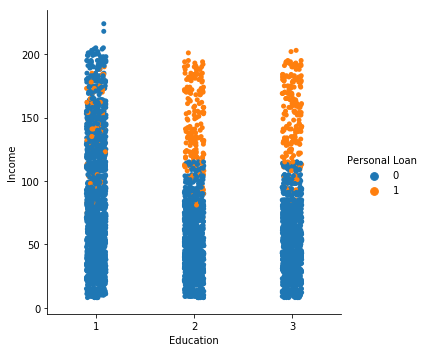

In [31]:
sns.catplot(x="Education", y="Income", data=loans, hue='Personal Loan')

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

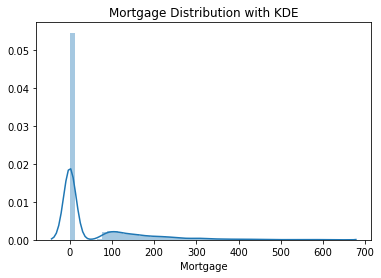

In [32]:
sns.distplot(feature['Mortgage'])
plt.title("Mortgage Distribution with KDE")

Text(0.5, 1.0, 'Mortgage Distribution with KDE First Transformation')

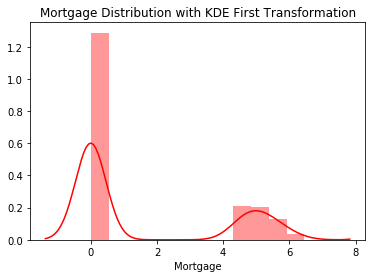

In [33]:
SingleLog_y = np.log1p(feature['Mortgage'])
sns.distplot(SingleLog_y, color='r')
plt.title("Mortgage Distribution with KDE First Transformation")

Text(0.5, 1.0, 'Mortgage Distribution with KDE Second Transformation')

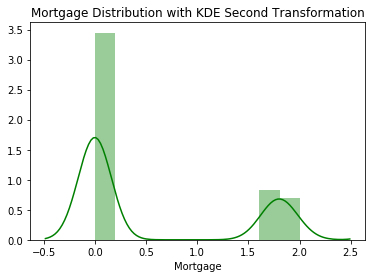

In [34]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution with KDE Second Transformation")

In [35]:
loans['Mortgage'] = DoubleLog_y

__Distribution analysis 2__

In [36]:
source_counts = pd.DataFrame(loans['Personal Loan'].value_counts()).reset_index()
source_counts.columns = ['Labels', 'Personal Loan']
source_counts

,Labels,Personal Loan
0,0,4520
1,1,480


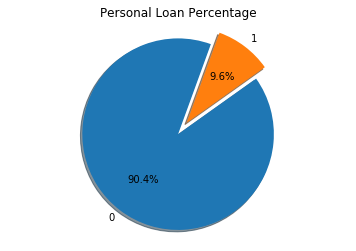

In [37]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts['Personal Loan'], explode=explode, labels=source_counts['Labels'],
        autopct='%1.1f%%', shadow=True, startangle=70)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()

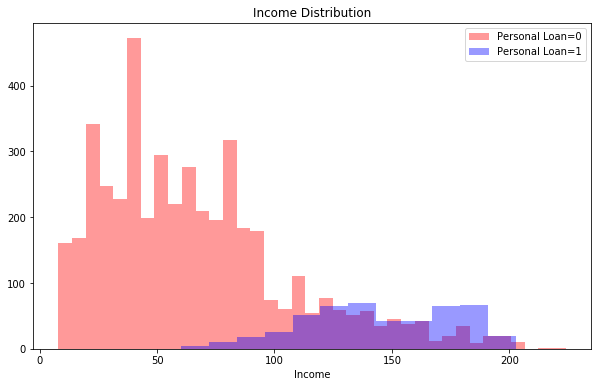

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]["Income"], color= 'r',
            label="Personal Loan=0", kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]["Income"], color='b',
             label="Personal Loan=1", kde=False)
plt.legend()
plt.title("Income Distribution")
plt.show()

Text(0.5, 1.0, 'CCAvg Distribution')

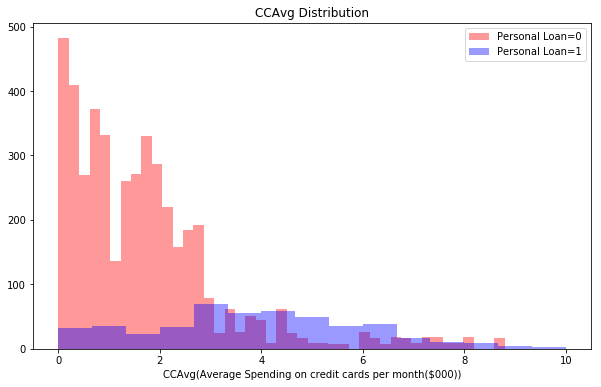

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]["CCAvg"], color='r',
            label="Personal Loan=0", kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]["CCAvg"], color='b',
            label="Personal Loan=1", kde=False)
plt.xlabel("CCAvg(Average Spending on credit cards per month($000))")
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Experience Distribution')

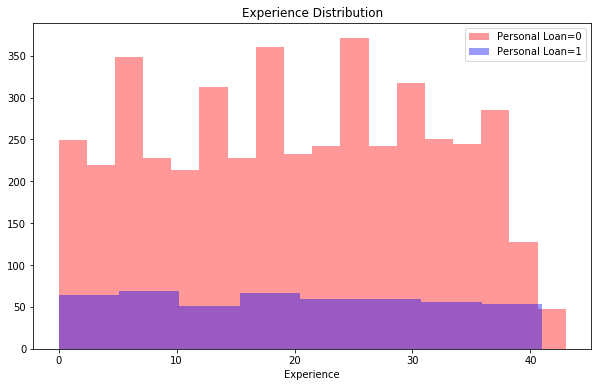

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5, 1.0, 'Securities Account Countplot')

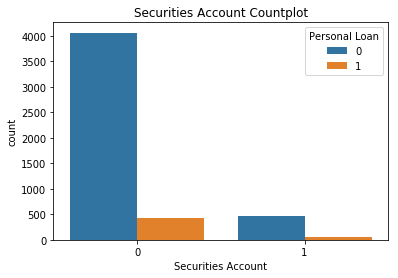

In [41]:
sns.countplot(x='Securities Account', data=loans, hue='Personal Loan')
plt.title("Securities Account Countplot")

Text(0.5, 1.0, 'Family Countplot')

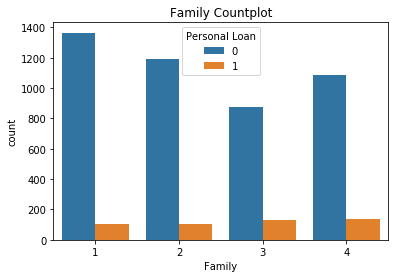

In [42]:
sns.countplot(x='Family', data=loans, hue='Personal Loan')
plt.title("Family Countplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

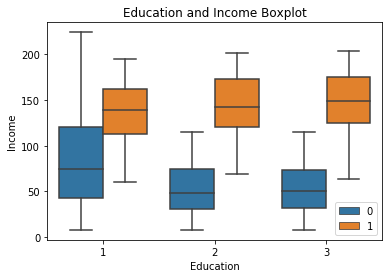

In [43]:
sns.boxplot(x='Education', data=loans, hue="Personal Loan", y="Income")
plt.legend(loc="lower right")
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Family and Income Boxplot')

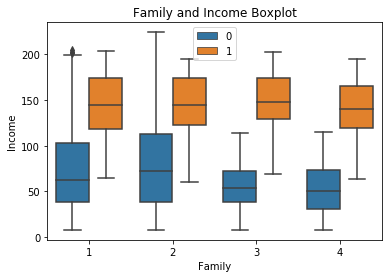

In [44]:
sns.boxplot(x='Family', y='Income', data=loans, hue='Personal Loan')
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

__Feature Selection__

In [45]:
feature = loans.drop(["ID", "Personal Loan"], axis=1)
target = loans["Personal Loan"]

__Feautre Removing__

In [46]:
feature = feature.drop(["ZIPCode", "Age", "Online", "CreditCard"], axis=1)

__Adding New Feature__

In [47]:
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]

# Feature scaling

In [48]:
feature.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Combination
1,1.0,49.0,4,1.6,1,0.0,1,0,9.497816
2,19.0,34.0,3,1.5,1,0.0,1,0,4.769211
3,15.0,11.0,1,1.0,1,0.0,0,0,0.916667
4,9.0,100.0,1,2.7,2,0.0,0,0,306.344887
5,8.0,45.0,4,1.0,2,0.0,0,0,3.750000


In [49]:
target.head()

1    0
2    0
3    0
4    0
5    0
Name: Personal Loan, dtype: int64

In [50]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 9 columns):
Experience            5000 non-null float64
Income                5000 non-null float64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Combination           5000 non-null float64
dtypes: float64(5), int64(4)
memory usage: 550.6 KB


In [51]:
for index in range(1, len(feature["Experience"])):
    print(feature["Experience"].loc[index])

1.0
19.0
15.0
9.0
8.0
13.0
27.0
24.0
10.0
9.0
39.0
5.0
23.0
32.0
41.0
30.0
14.0
18.0
21.0
28.0
31.0
27.0
5.0
18.0
11.0
19.0
16.0
20.0
30.0
13.0
35.0
16.0
28.0
6.0
5.0
24.0
35.0
25.0
18.0
13.0
32.0
9.0
7.0
15.0
20.0
31.0
14.0
12.0
26.0
16.0
8.0
37.0
6.0
26.0
5.0
17.0
30.0
31.0
2.0
5.0
24.0
21.0
18.0
17.0
23.0
35.0
36.0
23.0
21.0
29.0
18.0
29.0
20.0
16.0
3.0
7.0
32.0
20.0
30.0
26.0
36.0
22.0
16.0
9.0
22.0
2.0
16.0
22.0
41.0
1.0
30.0
10.0
19.0
34.0
39.0
12.0
15.0
28.0
23.0
41.0
23.0
36.0
23.0
18.0
32.0
0.0
17.0
18.0
7.0
17.0
14.0
38.0
15.0
34.0
14.0
40.0
29.0
33.0
16.0
7.0
29.0
26.0
32.0
13.0
15.0
35.0
5.0
8.0
14.0
16.0
4.0
34.0
1.0
4.0
29.0
33.0
32.0
25.0
34.0
35.0
25.0
11.0
9.0
1.0
23.0
35.0
19.0
25.0
28.0
22.0
22.0
0.0
32.0
36.0
29.0
0.0
0.0
17.0
6.0
35.0
0.0
35.0
12.0
4.0
27.0
1.0
1.0
9.0
26.0
1.0
1.0
28.0
13.0
34.0
17.0
20.0
25.0
3.0
29.0
37.0
27.0
12.0
0.0
3.0
26.0
14.0
23.0
21.0
40.0
29.0
36.0
25.0
23.0
24.0
29.0
10.0
24.0
31.0
3.0
11.0
6.0
9.0
3.0
34.0
31.0
12.0
25.0
10.0
16.0
39.

36.0
40.0
20.0
7.0
32.0
23.0
23.0
10.0
8.0
23.0
20.0
20.0
18.0
24.0
26.0
27.0
10.0
40.0
22.0
33.0
35.0
18.0
16.0
8.0
26.0
26.0
11.0
32.0
31.0
20.0
3.0
8.0
22.0
18.0
28.0
17.0
21.0
36.0
27.0
30.0
6.0
18.0
37.0
20.0
24.0
25.0
9.0
14.0
13.0
26.0
4.0
26.0
13.0
5.0
29.0
38.0
14.0
12.0
20.0
37.0
0.0
8.0
40.0
17.0
0.0
5.0
36.0
26.0
15.0
6.0
4.0
35.0
14.0
41.0
41.0
28.0
29.0
9.0
7.0
39.0
35.0
18.0
33.0
37.0
5.0
30.0
6.0
1.0
20.0
8.0
38.0
32.0
30.0
11.0
27.0
25.0
5.0
2.0
24.0
27.0
30.0
16.0
38.0
36.0
20.0
29.0
19.0
15.0
37.0
32.0
14.0
11.0
5.0
26.0
18.0
27.0
13.0
26.0
17.0
9.0
24.0
4.0
27.0
14.0
7.0
18.0
20.0
18.0
17.0
2.0
33.0
21.0
23.0
33.0
34.0
29.0
24.0
38.0
37.0
19.0
13.0
34.0
30.0
5.0
9.0
29.0
31.0
12.0
29.0
31.0
9.0
18.0
29.0
3.0
14.0
8.0
27.0
25.0
29.0
12.0
7.0
37.0
33.0
23.0
25.0
27.0
1.0
11.0
0.0
38.0
36.0
33.0
7.0
8.0
31.0
31.0
5.0
29.0
32.0
24.0
22.0
9.0
6.0
16.0
31.0
37.0
29.0
13.0
20.0
33.0
31.0
35.0
13.0
21.0
22.0
26.0
9.0
9.0
10.0
34.0
20.0
3.0
22.0
20.0
30.0
33.0
26.0
25.0
32.0

11.0
10.0
7.0
34.0
16.0
18.0
30.0
27.0
7.0
13.0
10.0
26.0
25.0
24.0
12.0
32.0
12.0
7.0
22.0
20.0
23.0
19.0
28.0
13.0
7.0
6.0
38.0
30.0
12.0
41.0
13.0
9.0
36.0
26.0
32.0
20.0
25.0
11.0
21.0
34.0
1.0
1.0
24.0
21.0
8.0
29.0
5.0
17.0
5.0
16.0
19.0
13.0
25.0
6.0
11.0
40.0
7.0
34.0
10.0
13.0
35.0
11.0
35.0
23.0
24.0
12.0
10.0
17.0
7.0
21.0
16.0
11.0
4.0
35.0
19.0
31.0
3.0
37.0
16.0
9.0
28.0
14.0
1.0
26.0
14.0
26.0
23.0
14.0
11.0
13.0
0.0
7.0
0.0
21.0
3.0
25.0
28.0
34.0
39.0
35.0
34.0
3.0
27.0
34.0
17.0
35.0
28.0
13.0
19.0
35.0
22.0
22.0
36.0
7.0
16.0
5.0
27.0
28.0
37.0
36.0
35.0
37.0
1.0
17.0
40.0
0.0
1.0
3.0
39.0
34.0
5.0
6.0
8.0
15.0
26.0
16.0
15.0
8.0
8.0
10.0
17.0
35.0
14.0
27.0
11.0
13.0
23.0
39.0
9.0
25.0
36.0
32.0
38.0
30.0
32.0
33.0
26.0
20.0
23.0
7.0
25.0
18.0
5.0
41.0
17.0
14.0
21.0
33.0
35.0
4.0
2.0
21.0
41.0
25.0
35.0
7.0
25.0
32.0
34.0
15.0
9.0
14.0
2.0
5.0
11.0
2.0
28.0
32.0
14.0
23.0
8.0
27.0
14.0
20.0
9.0
0.0
19.0
28.0
5.0
12.0
22.0
10.0
34.0
11.0
35.0
10.0
21.0
30.0
21.0
0.0

To calculate the standard deviation of a column:

1. Work out the Mean (the simple average of the numbers)
2. Then for each number: subtract the Mean and square the result
3. Then work out the mean of those squared differences.
4. Take the square root of that and we are done!

In [55]:
def std_dev(x, mean_x):
    new_x = []
    for index in range(1, len(x)):
        new_x.append(pow(x.loc[index] - mean_x, 2))
    new_mean = mean(new_x)
    return math.sqrt(new_mean)
        
# test = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4]
# print(std_dev(test, 7))
    

In [56]:
colscal = ["Experience", "Income", "CCAvg", "Mortgage", "Combination"]

def scale(data, col_names):
    """data is in the form of a Pandas DataFrame
    Given the distribution of the data, 
    each value in column will have the sample mean value subtracted and then divided by the standard deviation of the whole column"""
    length = len(data)
    for col in col_names:
        print(col)
        mean  = 1/length * sum([value for value in data[col]])
        std_dev_ = std_dev(data[col], mean)
        for index in range(1, length):
            data[col].loc[index] = (data[col].loc[index] - mean) / std_dev_
scale(feature, colscal)
         
    
    
    

Experience
Income
CCAvg
Mortgage
Combination


In [390]:
def train_test_split(features, target, test_size=0.2, random_state=1):
    #Combine and Shuffle the data
    dataframe = [features, target]
    combined_data = pd.concat(dataframe, axis=1)
    combined_data = combined_data.sample(frac=1).reset_index(drop=True)
    cols = list(combined_data.columns)
    
    #Actual Splitting of the dataset
    #Initialise the train and test dictionaries
    train_df = {}
    test_df = {}
    for col in cols:
        train_df[col] = []
        test_df[col] = []
    
    length = len(combined_data)
    test_len = int(length * test_size)
    
    for i in range(length):
        if i < test_len:
            for col in cols:
                attribute = combined_data.loc[i][col]
                test_df[col].append(attribute)
        else:
            for col in cols:
                attribute = combined_data.loc[i][col]
                train_df[col].append(attribute)
    
    #Converting the train and test dictionaries into dataframes
    train_frame = pd.DataFrame(train_df, index=list(range(length-test_len)))
    test_frame = pd.DataFrame(test_df, index=list(range(test_len)))
    
    x_train_frame = train_frame.iloc[:, :-1]
    y_train_frame = train_frame.iloc[:, -1]
    
    x_test_frame = test_frame.iloc[:, :-1]
    y_test_frame = test_frame.iloc[:, -1]
    
    return x_train_frame, y_train_frame, x_test_frame, y_test_frame

X_train, y_train, X_test, y_test = train_test_split(feature, target, test_size=0.3)
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)






(3500, 9)
(3500,)
(1500, 9)
(1500,)


# <font color=red>Decision Tree(C4.5)</font>

In [381]:
X_train.head(10)
y_train.head(10)


0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    1.0
9    0.0
Name: Personal Loan, dtype: float64

__Building the C4.5 tree:__

1) Calculate the global entropy of the 2 categories(Personal Loan:0, Personal Loan:1)
<br>
2) For each categorical attribute, first, loop through all of the possible values and then calculate the entropy for each value for that particular attribute. 

In math terms, if $p_{i}$ is the proportion of data labeled as class $c_{i}$, we define the entropy as:
H(S) = -$p_{1}$$log_{2}$$p_{1}$-...-$p_{n}$$log_{2}$$p_{n}$

2nd, calculate the gain of each categorical attribute, where $$Gain(Decision, Wind) = Entropy(Decision) - \sum [p(Decision|category=value) * Entropy(Decision|category=value)] $$
<br>
3rd, calculate the SplitInfo, where $$SplitInfo(A) = -\sum (value/datalength)log_{2}(value/length_of_data)$$
<br>
4th, calculate the GainRatio, where GainRatio(A) = Gain(A) / SplitInfo(A)

<br>
<br>
<br>






1) For numerical attributes, find out the min and max values of each attribute
<br>
2) Figure out the step value of each attribute. The step value will be the threshold to split on
<br>
3) Loop through each threshold value and first, calculate the entropy for the part below and above the threshold
<br>
4) Calculate the Gain for the numerical attribute where each probability will be the amount of instances that are either below or above the threshold 
<br>
5) Find the threshold that maximises the Gain and pick that one
<br>
<br>
<br>
<br>

1) Add a decision node based on the chosen attribute
<br>
2) Recur on each partitioned subset using the remaining attributes

In [382]:
df = pd.concat([X_train, y_train], axis=1)
print(list(df.loc[30]))
# print((df.columns)[-1])
df.head()

[-0.3633568731276356, -0.33746321247058914, 4.0, 0.41860896528688707, 1.0, -0.665717171235663, 0.0, 0.0, -0.02924574079419228, 0.0]


,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Combination,Personal Loan
0,-1.064317,-0.011659,4.0,-1.051992,2.0,1.588813,0.0,0.0,-0.029246,0.0
1,-1.502418,1.313279,2.0,0.779106,1.0,-0.665717,0.0,0.0,-0.029246,0.0
2,-0.538597,2.268972,1.0,0.378554,3.0,-0.665717,0.0,0.0,-0.029246,1.0
3,-0.100497,-1.097674,3.0,-0.725828,2.0,-0.665717,0.0,0.0,-0.029246,0.0
4,-0.450977,2.030049,2.0,3.468532,1.0,1.489157,1.0,0.0,0.003617,0.0


In [383]:
# for index in range(len(df)):
#     print(list(df.loc[index]))

In [384]:
def global_entropy(data):
    unique_labels = data.iloc[:, -1].unique()
    entropy = 0
    count = [0] * len(unique_labels)
    for index in range(len(count)):
        new_df = data[data[list(data.columns)[-1]] == float(index)]
        length = len(new_df)
        count[index] = length
    global_entropy = 0
    class_probs = []
    for index in range(len(count)):
        p = count[index]/len(data.iloc[:, -1]) 
        class_probs.append(p)
        global_entropy -= p* math.log(p, 2)
    return class_probs, global_entropy
    
entropy(df)

0.462623491762443

In [353]:
print(feature["Education"].dtype)
print(np.dtype(np.int64) == feature["Education"].dtype)

feature.info()

int64
True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 9 columns):
Experience            5000 non-null float64
Income                5000 non-null float64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Combination           5000 non-null float64
dtypes: float64(5), int64(4)
memory usage: 550.6 KB


In [354]:
# def Gain_Ratio(x, class_probs):
    
#     unique_labels = x.unique()
#     #Calculating Entropy
#     entropies = [0] * len(unique_labels)
#     for index, label in enumerate(unique_labels):
#         entropy = 0
#         for class_prob in class_probs:
#             entropy -= class_probs * math.log(class_prob, 2)
#         entropies[index] = entropy
        
#     #Calculating Gain
#     gain = 
#     for index, label in enumerate(unique_labels):

def sort(element):
    key, value = element
    return value


dict_ = {"Hello": 8,
       "There": 3,
       "Hey": 5,
       "What": 6}

print(dict(sorted(dict_.items(), key=sort, reverse=True)))
        
print(df['Income'].loc[1])

{'Hello': 8, 'What': 6, 'Hey': 5, 'There': 3}
0.0752223893357105


In [341]:
df = df.drop(1025, axis=0, inplace=False).reset_index()


In [344]:
print(df[df["Income"] > 19.66610131])

Empty DataFrame
Columns: [index, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Combination, Personal Loan]
Index: []


In [391]:
X_train.drop(3136, axis=0, inplace=False).reset_index()
y_train.drop(3136, axis=0, inplace=False).reset_index()


,index,Personal Loan
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [409]:
X_train.drop('Combination', axis=1, inplace=True)
X_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,-1.239558,0.813712,3.0,0.321332,1.0,-0.665717,0.0,0.0
1,0.425224,-0.207141,3.0,-0.708661,2.0,-0.665717,0.0,0.0
2,-1.677658,0.292425,2.0,-0.079221,2.0,-0.665717,0.0,0.0
3,-0.626217,2.051769,1.0,2.781870,3.0,-0.665717,0.0,1.0
4,-0.188117,0.314146,1.0,-1.051992,2.0,1.620801,0.0,0.0


In [392]:
print(X_train)



      Experience    Income  Family     CCAvg  Education  Mortgage  \
0      -1.239558  0.813712     3.0  0.321332        1.0 -0.665717   
1       0.425224 -0.207141     3.0 -0.708661        2.0 -0.665717   
2      -1.677658  0.292425     2.0 -0.079221        2.0 -0.665717   
3      -0.626217  2.051769     1.0  2.781870        3.0 -0.665717   
4      -0.188117  0.314146     1.0 -1.051992        2.0  1.620801   
5      -0.976697 -1.162834     2.0 -0.308108        3.0  1.449910   
6       0.775704 -0.315743     3.0  0.149666        3.0  1.366167   
7       1.389044  1.269839     1.0  0.378554        1.0 -0.665717   
8       1.038564  0.205544     1.0  1.351325        1.0 -0.665717   
9       0.425224 -0.098540     1.0 -0.651439        3.0 -0.665717   
10     -0.626217  2.529616     2.0  0.607441        1.0 -0.665717   
11     -1.151937  0.140383     3.0 -0.193665        1.0 -0.665717   
12      0.162364 -1.097674     4.0 -0.880327        2.0  1.475639   
13     -0.275737 -0.728429     3.0

In [652]:


class C4_5(object):
    
    
    def __init__(self, feature, target):
        
        self.target = target
        self.feature = feature
        
        data = pd.concat([feature, target], axis=1)
        self.data = data
        self.data_size = len(self.data)
        self.class_probs, self.global_entropy = self.global_entropy(self.data)
        self.attributes = list(self.feature.columns)
        self.data_attributes = list(self.data.columns)
        self.float_thresholds = defaultdict(float)
        self.attribute_ratios = {} 
        self.attribute_ratio()
        
        self.tree = self.create_tree()
        
        
        
    def global_entropy(self,data):
        unique_labels = data.iloc[:, -1].unique()
        entropy = 0
        count = [0] * len(unique_labels)
        for index in range(len(count)):
            new_df = data[data[list(data.columns)[-1]] == float(index)]
            length = len(new_df)
            count[index] = length
        global_entropy = 0
        class_probs = []
        for index in range(len(count)):
            p = count[index]/len(data.iloc[:, -1]) 
            class_probs.append(p)
            global_entropy -= p* math.log(p, 2)
        return class_probs, global_entropy
        
    
    def partition_by(self, data, attribute):
        """the data is  a dataframe where each row represents an instance 
            and the last column represent the class of each instance"""
#         print(attribute)
#         print(data[attribute].unique())
        partitions = defaultdict(list)
        indices = data.index.values.tolist()
        if data[attribute].dtype == np.dtype(np.float64):
#             print( self.float_thresholds[attribute])
            threshold = self.float_thresholds[attribute]
#             print(threshold)
            max_value = data[attribute].max()
            for index in indices:
                instance = data.loc[index]       
                if data[attribute].loc[index] < threshold:
                    partitions[threshold].append(instance)
                else:
                    partitions[max_value].append(instance)
            
        elif data[attribute] == np.dtype(np.int64):
            for index in range(len(data)):
                instance = list(self.data.loc[index])
                value = data[attribute].loc[index]
                partitions[value].append(instance)
        else:
            print("This column: ", attribute, "is not in the correct datatype!")
                
        for unique_value in partitions:
            partitions[unique_value] = pd.DataFrame(partitions[unique_value], columns=self.data_attributes)

        return partitions
    
    def attribute_ratio(self):
        for col in self.attributes:
            dtype = self.data[col].dtype
            if dtype == np.dtype(np.int64):
                self.attribute_ratios[col] = self.Gain_Ratio(col)
            elif dtype == np.dtype(np.float64):
                threshold, ratio = self.Gain_Ratio_n(col)
                self.float_thresholds[col] = threshold
                self.attribute_ratios[col] = ratio
                
            else:
                print("This column: ", col, "is not in the correct datatype!")
        self.attribute_ratios = dict(sorted(self.attribute_ratios.items(), key=sort, reverse=True))

        
  
    def create_tree(self, data=None, split_candidates=None): 

        input_data = 0
        if data is None:
            input_data = self.data
        else:
            input_data = data
            
            
        
        if split_candidates == None:
            split_candidates = self.attribute_ratios.keys()

        
        num_inputs = len(input_data)
        
        num_trues = len([label for label in list(input_data[(input_data.columns)[-1]]) if label == 1.0])
        num_falses = num_inputs - num_trues
        
        if len(input_data) < 500:
            print()
            return num_trues <= num_falses
        
        if num_trues == 0: return False
        if num_falses == 0: return True
        
        if not split_candidates:
            return num_trues >= num_falses
        
        best_attribute = list(self.attribute_ratios.keys())[0]

        self.attribute_ratios.pop(best_attribute)
        
        
        partitions = self.partition_by(input_data, best_attribute)


#         self.tree = {value : return self.create_tree(data=subset)
#                     for value, subset in partitions.items()}
        
        subtrees = {value : self.create_tree(data=subset)
                    for value, subset in partitions.items()}
        
        subtrees[None] = num_trues >= num_falses
        
        return (best_attribute, subtrees)
        
    
    def count(self, x):
        
        
        """find the number of instances that contain each value in the category
        and find the fraction of each value and returns it in a dict"""
        df_col = self.data[x]
        unique_values = df_col.unique()
        prob_counts = {}
        
        #Make space for each of the value in the column
        #Each key is a different number and the value are the Total_count, the 0_counts and the 1_counts
        for value in unique_values:
            prob_counts[value]["Total_COUNT"] = 0
            prob_counts[value]["0_COUNT"] = 0
            prob_counts[value]["1_COUNT"] = 0
        
        for index in range(len(x)):
            value = df_col.loc[index]
            prob_counts[value]["Total_COUNT"] += 1
            if self.target.loc[index] == 0.0:
                prob_counts[value]["0_COUNT"] += 1
            else:
                prob_counts[value]["1_COUNT"] += 1
        return prob_counts
            
        
#             prob_counts[value] += 1
#         for feature in counts:
#             prob_counts[feature] = counts[feature] / self.data_size
#         return counts
     
    
    def count_n(self, x, threshold):
        prob_values = {}
        df_col = self.data[x]
        
        for i in range(2):
            prob_values[i] = {}
        
        for i in range(2):
            prob_values[i]["Total_COUNT"] = 0
            prob_values[i]["0_COUNT"] = 0
            prob_values[i]["1_COUNT"] = 0
        for index in range(len(df_col)):
            value = df_col.loc[index]
            if value <= threshold:
                prob_values[0]["Total_COUNT"] += 1
                if self.target.loc[index] == 0.0:
                    prob_values[0]["0_COUNT"] += 1
                else:
                    prob_values[0]["1_COUNT"] += 1
            else:
                prob_values[1]["Total_COUNT"] += 1
                if self.target.loc[index] == 0.0:
                    prob_values[1]["0_COUNT"] += 1
                else:
                    prob_values[1]["1_COUNT"] += 1
        return prob_values
        
        
    def Gain_Ratio(self, col):
        prob_values = self.count(col)

        #Calculating Entropy
        entropies = defaultdict(float)
        target_values = ["0_COUNT", "1_COUNT"]
        for value in prob_values:
            entropy = 0
            for target_value in target_values:
                total = prob_values[value]["Total_COUNT"]
                prob = prob_values[value][target_value]
                entropy -= prob/total * math.log(prob/total)
            entropies[value] = entropy

        #Calculating Gain
        gain = self.global_entropy
        for value in entropies:
            total_count = prob_values[value]["Total_COUNT"]
            total_prob = total_count / self.data_size
            gain -= total_prob / entropies[value]
            
        
        #Calculating the SplitInfo
        split_info = 0
        for value in prob_values:
            total_count = prob_values[value]["Total_COUNT"]
            total_prob = total_count / self.data_size
            split_info -= total_prob * math.log(total_prob, 2)
            
        GainRatio = gain / split_info
        
        return GainRatio
    
    def Gain_Ratio_n(self, col):
        min_value = self.data[col].min()
        max_value = self.data[col].max()

        
        thresholds = np.linspace(min_value, max_value, num=5)
        
        gain_ratios = defaultdict(float)
        for threshold in thresholds[1:-1]:
            prob_values = self.count_n(col, threshold)
            
            #calculate the entropy for each threshold
            entropies = defaultdict(float)
            target_values = ["0_COUNT", "1_COUNT"]
            for value in prob_values:
                entropy = 0
                #loop through each class probability
                for target_value in target_values:
                    total = prob_values[value]["Total_COUNT"]
                    count = prob_values[value][target_value]
                    if total == 0:
                        continue
                    frac = count/total
                    if frac == 0:
                        continue
                    entropy -= count/total * math.log(count/total)
                entropies[value] = entropy

            
            #Calculating the gain
            gain = self.global_entropy
            for value in prob_values:
                total_count = prob_values[value]["Total_COUNT"]
                total = total_count / self.data_size
                entropy = entropies[value]
                gain -= total * entropy

            #Calculating the splitInfo
            split_info = 0
            
            for value in prob_values:
                total_count = prob_values[value]["Total_COUNT"]
                total = total_count / self.data_size
                if total == 0:
                    continue
                split_info -= total * math.log(total, 2)
            
                
            #Calculating the gain_ratio
            gain_ratio = 0
            try:
                gain_ratio = gain / split_info
            except ZeroDivisionError:
                gain_ratio = 0

            gain_ratios[threshold] = gain_ratio
            
        #Now, we need to find out the threshold which has the maximises the gain
        gain_ratios = dict(sorted(gain_ratios.items(), key=sort, reverse=True))
        max_gain_ratio = list(gain_ratios.values())[0]
        threshold = list(gain_ratios.keys())[0]
        

        return threshold, max_gain_ratio
    
    def classify(self, input_data, tree=None):
        
        
        if tree is None:
            tree = self.tree

        if tree in [True, False]:
            return tree
        
        attribute, subtree_dict = tree
        attribute_value = input_data[attribute]
                

        if attribute_value not in subtree_dict and type(attribute_value) != np.float64:
            attribute_value = None
            
        if type(attribute_value) == np.float64:
            keys = list(subtree_dict.keys())
            if attribute_value < keys[0]:
                attribute_value = keys[0]
            else:
                attribute_value = keys[1]
            
        subtree_dict = subtree_dict[attribute_value]

        return self.classify(input_data, subtree_dict)
    
#     def is_float(num):
#         if num 
        
    def accuracy(self, predict_data, labels):
        self.test_data = predict_data
        y_test = list(labels)
        y_pred = []
        for index in range(len(self.test_data)):
            instance = self.test_data.loc[index]
            predict = self.classify(instance)
            y_pred.append(predict)
        

        total = len(predict_data)
        correct = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]])
        
        self.accuracy = correct / total * 100
        
        print(self.accuracy)
        return self.accuracy 

# tree = c4_5.create_tree()

In [654]:

c4_5 = C4_5(X_train, y_train)

In [655]:
print(c4_5.tree)

('CCAvg', {3.1824232222093967: ('CD Account', {0.25: ('Income', {1.7639753125167525: ('Securities Account', {0.25: ('Experience', {1.0604691552004233: ('Family', {3.25: ('Education', {2.0: ('Mortgage', {-0.06340976427816425: False, 1.7071337517859138: True, None: False}), 3.0: False, None: False}), 4.0: False, None: False}), 2.0023848354789853: False, None: False}), 1.0: True, None: False}), 2.833699832988345: True, None: False}), 1.0: True, None: False}), 4.612968903846306: True, None: False})


In [656]:
# print((y_test).value_counts())
# result  = c4_5.classify()
# print(result)
c4_5.accuracy(X_test, y_test)

75.66666666666667


75.66666666666667

In [559]:
ones = zeros = 0
for index in range(len(y_test)):
    if y_test.loc[index] == 0.0:
        zeros += 1
    else:
        ones += 1
print(zeros/len(y_test)*100)

90.13333333333333


In [507]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [502]:
X_test.drop('Combination', axis=1, inplace=True)
print(X_test.shape)

(1500, 8)


In [508]:
clf = DecisionTreeClassifier()
print(X_train.shape)
print(X_test.shape)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

(3500, 8)
(1500, 8)
0.9853333333333333
